# Introduction
In the healthcare industrym the early detection and management of critical medical conditions can significantly impact patient outcomes and improve the quality of care. One such life-threatening condition is sepsis,  which is the body's extreme response to an infection. Sepsis happens when an infection you arleady have triggers a chain reaction throughout the body. Prompt identification and intervention in cases of sepsis are pivotal in preventing its progression and reducing mortality rates.
This analysis embarks on the exploration of a dataset containing essential medical and demographic information of patients in an Intensive Care Unit (ICU). The primary objective is to leverage this dataset to develop a predictive model that can effectively identify individuals at risk of developing sepsis during their ICU stay. By doing so, healthcare professionals can receive early warnings, allowing them to initiate timely interventions and potentially save lives.

#  Questions
1. What is the distribution of Sepsis
2. What is the distribution of Age
3. How Many Patients have Insurance
4. Is Blood Pressure Affected by Age
5. How many patients in each BMI category have sepsis?
6. How many of the patients fall under the Normal, Elevated and High Blood Pressure?


# Hypothesis

## Hypothesis 1:

* Null Hypothesis (H0): There is no significant relationship between a patient's age and the likelihood of developing sepsis.

* Alternative Hypothesis (H1): The age of a patient is a significant factor that influences the likelihood of developing sepsis.

## Hypothesis 2
* Null Hypothesis (H0): There is no significant difference in the distribution of
blood pressure (PR) values between patients who develop sepsis (Sepsis: Positive) and those who do not (Sepsis: Negative).

* Alternative Hypothesis (H1): There is a significant difference in the distribution of blood pressure (PR) values between patients who develop sepsis (Sepsis: Positive) and those who do not (Sepsis: Negative).

# Importations

In [1]:
# Importations
import pandas as pd
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Hypothesis Testing
from scipy import stats
import statistics as stat

# Import the label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE

# Splitting the data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


# Modelling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Exporting the Model
import pickle

# Data Loading

In [2]:
train = pd.read_csv("Data/Paitients_Files_Train.csv")
test = pd.read_csv("Data/Paitients_Files_Test.csv")

# Data Understanding

* ID: number to represent patient ID

* PRG: Plasma glucose

* PL: Blood Work Result-1 (mu U/ml)

* PR: Blood Pressure (mmHg)

* SK: Blood Work Result-2(mm)

* TS: Blood Work Result-3 (muU/ml)

* M11: Body mass index (weight in kg/(height in m)^2

* BD2: Blood Work Result-4 (mu U/ml)

* Age: patients age(years)

* Insurance: If a patient holds a valid insurance card

* Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis otherwise

In [3]:
train.shape,test.shape

((599, 11), (169, 10))

The training dataset has 599 rows and 11 columns, while the test dataset has 169 rows and 10 columns.

In [4]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


The training dataset has 599 entries(columns) and 11 rows. All the columns have 599 entries, which shows that there are no missing values. Sepsis is wrongly mispelled as Sepssis.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


The test dataset has 169 entries and 10 columns. The sepsis column is missing unlike in the train dataset

In [8]:
# Descriptive statistics of the train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [9]:
#Checking for Missing Values
train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [10]:
# Missing Values in the test dataset
test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [11]:
# Categories in the Sepssis column
train['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [12]:
# Columns in the Train dataset
train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

# Exploratory Data Analysis
## Univariate Analysis

### 1. What the distribution of sepsis

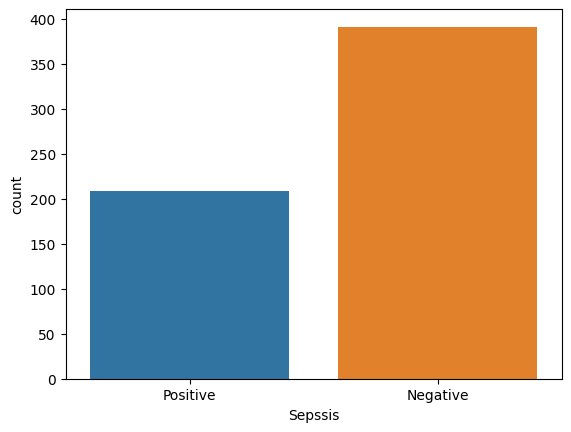

In [13]:
# Distribution of Sepssis
sns.countplot(x='Sepssis',data=train)
plt.show()

There are 391 negative cases which are the patients who did not develop sepsis during their stay in the intensive Care Unit(ICU). The positive cases are 208, which are the patients who developed sepsis during their stay in the ICU. The larger proportion of the patients did not develop sepsis, whole a smaller proportion did develop sepsis.

## 2. What is the distribution of ages for patients captured in the data?


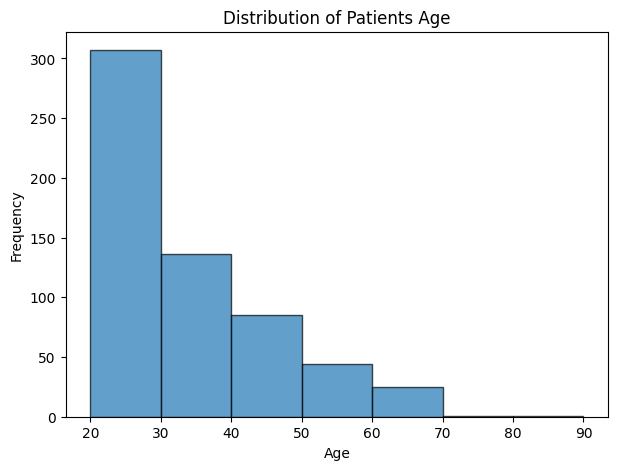

Mean Age: 33.29
Median Age: 29.0
Minimum Age: 21
Maximum Age: 81


In [14]:
# We plot the distribution of ages for all the patients
plt.figure(figsize=(7,5))
plt.hist(train['Age'],bins=7,range = (20,90),edgecolor='k',alpha=0.7)
plt.title("Distribution of Patients Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Calculating the summary statistics of the age column
mean_age = train['Age'].mean()
median_age = train['Age'].median()
min_age = train['Age'].min()
max_age = train['Age'].max()

# Print summary statistics
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")


From the histogram, the age group from 20-30 years has the highest number of patients, with more than 300 individuals.This suggests that majority of the patients are relatively young, followed by a gradual decline in the number of patients in older age groups.The age range is widely distributed, including both young and elderly individuals.
The mean age of patients in the dataset is approximatel 33.29 years. The median age is 29.0 years, which suggests that half of the a patients are below 29 years old and half are above 29 years old. The youngest patient is 21 years and the oldest patient is 81 years old.

## 3. How many patiients have insurance?


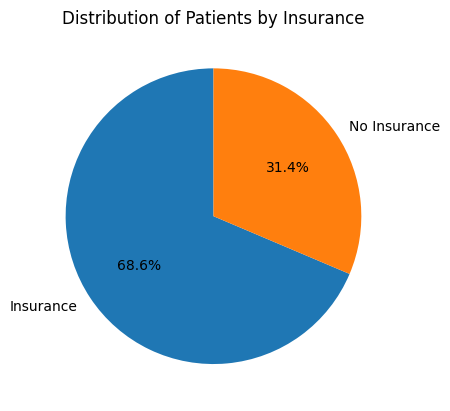

In [15]:
#We count the number of patients with insurance
insurance_count = train['Insurance'].value_counts()
labels = ['Insurance','No Insurance']
plt.title('Distribution of Patients by Insurance')
# We plot the pie chart
plt.pie(insurance_count,labels=labels,autopct='%1.1f%%', startangle=90)
plt.show()

The larger portion of the pie chart is dedicated to patients with insurance, represented as "Insurance: 1."
The percentage value (68.6%) next to this segment indicates that approximately 68.6% of the patients in the dataset have insurance while 31.4% of the patients do not have insurance.

## 4. Is Blood Pressure affected by Age?


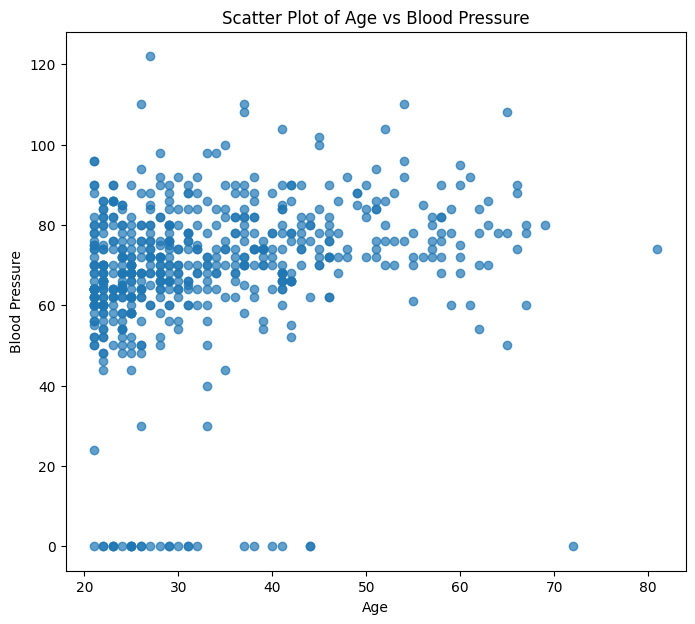

In [16]:
plt.figure(figsize=(8,7))
plt.scatter(train['Age'],train['PR'],alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title("Scatter Plot of Age vs Blood Pressure")
plt.show()

Most of the Values lie between 40 and 80. This represents the systolic or diastolic blood pressure values. Most of the values cluster within this range which indicates that blood pressure tends to be within a relatively normal or typical range for a large portion of the population in the dataset.

## Correlation Between the features
The correlation between each feature must be investigated to find out if any pair of features are highly correlated (e.g., one feature can predict another feature). If two features are highly correlated, they are possibly redundant and one should be removed to reduce the dimension of the dataset and avoid multicollinearity. For this task, a statistical test for correlation is carried out: Pearson's  R. Pearson's R tests for linear correlation between two continuous variables. The Pearson correlation coefficient R ranges between -1 (perfectly negative linear correlation) to 1 (perfectly positive linear correlation), and 0 means there is no correlation between the two variables.

In [17]:
# Calculating correlation
pearson_r = train.corr(method='pearson')
# Plotting a heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(data=pearson_r, vmin=-1, vmax=1, annot=True, cmap='summer',ax=ax)

ValueError: could not convert string to float: 'ICU200010'

From the correlation heatmap of the train set, there is not many correlations between the features. The correlations are pretty weak, with the correlation coefficients wanders around 0.3 or less. The only exception is the Age-PRG. This indicates that the older the patient, the higher their plasma glucose level is. However, the correlation coefficient of 0.53 is not neccessarily very strong to say that age can predict PRG level accurately. Therefore, all features will be kept.

# Hypothesis Testing
Hypothesis is simple a supposition or proposed explanation made on the basis of limited evidence as a starting point for further investigation.Hypothesis testing  is a formal procedure for investigating our ideas about the world using stastics. It is most often used by scientists to test specific predictions called hypotheses, that arise from theories.
Steps Involved in Hypothesis testing:
* State the null and alternate hypothesis
* collect data
* Perfom statistical test
* Decide whether to reject or accept the null hypothesis
* Present the findings


## Hypothesis 1:

* Null Hypothesis (H0): There is no significant relationship between a patient's age and the likelihood of developing sepsis.

* Alternative Hypothesis (H1): The age of a patient is a significant factor that influences the likelihood of developing sepsis.

In [18]:
# We define Negative and Positive Sepsis Cases
Sepsis_Negative = train[train['Sepssis']=='Negative']
Sepsis_Positive = train[train['Sepssis']=='Positive']

In [19]:
t,p = stats.ttest_ind(Sepsis_Negative['Age'],Sepsis_Positive['Age'],equal_var=False)

In [20]:
print(p)

1.085959278630566e-07


In [21]:
# Separate data into two groups: patients with sepsis (Sepsis: Positive) and without sepsis (Sepsis: Negative)
sepsis_positive = train[train['Sepssis'] == 'Positive']['Age']
sepsis_negative = train[train['Sepssis'] == 'Negative']['Age']

In [22]:
# Set significance level (alpha)
alpha = 0.05

 # Perform a two-sample independent t-test
t_stat, p_value = stats.ttest_ind(sepsis_positive, sepsis_negative, equal_var=False)


In [23]:
# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 5.398028835705048
P-value: 1.085959278630566e-07


In [24]:
# Compare p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in age between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in age between patients with and without sepsis.")

Reject the null hypothesis. There is a significant difference in age between patients with and without sepsis.


<Axes: xlabel='Age', ylabel='Count'>

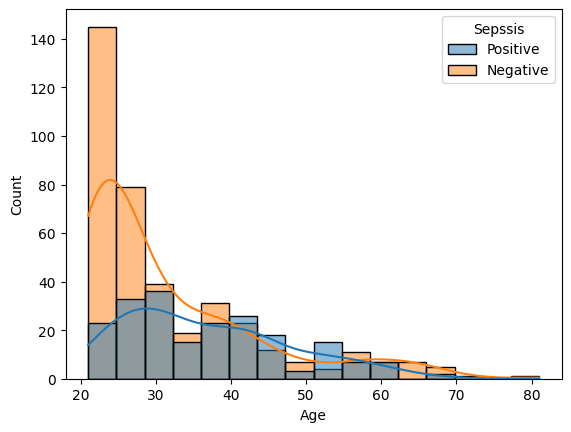

In [25]:
sns.histplot(data=train,x='Age',hue='Sepssis',kde=True)

## Hypothesis 2
* Null Hypothesis (H0): There is no significant difference in the distribution of
blood pressure (PR) values between patients who develop sepsis (Sepsis: Positive) and those who do not (Sepsis: Negative).

* Alternative Hypothesis (H1): There is a significant difference in the distribution of blood pressure (PR) values between patients who develop sepsis (Sepsis: Positive) and those who do not (Sepsis: Negative).

In [26]:
# Separate data into two groups: patients with sepsis (Sepsis: Positive) and without sepsis (Sepsis: Negative)
sepsis_positive = train[train['Sepssis'] == 'Positive']['PR']
sepsis_negative = train[train['Sepssis'] == 'Negative']['PR']

In [27]:
# Perform the Mann-Whitney U test (non-parametric test)
statistic, p_value = stats.mannwhitneyu(sepsis_positive, sepsis_negative, alternative='two-sided')


In [28]:
# Set significance level (alpha)
alpha = 0.05

# Print the test statistic and p-value
print(f"Test Statistic (Mann-Whitney U): {statistic}")
print(f"P-value: {p_value}")

Test Statistic (Mann-Whitney U): 47673.5
P-value: 0.0005014049708706393


In [29]:
# Compare p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in PR values between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in PR values between patients with and without sepsis.")


Reject the null hypothesis. There is a significant difference in PR values between patients with and without sepsis.


# Data Preprocessing


### Rename the Sepssis, M11 and PR Columns

In [30]:
# Renaming the seppsis, BMI and Blood pressure columns
train = train.rename(columns={'Sepssis': 'Sepsis'})
train = train.rename(columns={'M11': 'BMI'})
train = train.rename(columns={'PR': 'BP'})

# Test dataset
test = test.rename(columns={'M11': 'BMI'})
test = test.rename(columns={'PR': 'BP'})

train.head()

,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [31]:
test.head()

,ID,PRG,PL,BP,SK,TS,BMI,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### Checking for Duplicates

In [32]:
#Checking for duplicates in the train dataset
train.duplicated().sum()

0

In [33]:
#The number each of the categories occurs
print('The categories in the Spesis column are: ')
print(train['Sepsis'].value_counts())
#The number each of the Insurance Column
print('The categories in the Insurance column are: ')
print(train['Insurance'].value_counts())
#The number each of the categories occurs
print('The categories in the PRG column are: ')
print(train['PRG'].value_counts())

The categories in the Spesis column are: 
Sepsis
Negative    391
Positive    208
Name: count, dtype: int64
The categories in the Insurance column are: 
Insurance
1    411
0    188
Name: count, dtype: int64
The categories in the PRG column are: 
PRG
1     100
0      93
2      76
3      59
4      54
5      49
7      37
6      37
8      32
9      20
10     16
12      8
11      7
13      7
14      2
15      1
17      1
Name: count, dtype: int64


### Dropping the Unneccessary Columns

In [34]:
train.drop(['ID','Insurance'],axis=1,inplace=True)
test.drop(['ID','Insurance'],axis=1,inplace=True)

In [35]:
test.head()

,PRG,PL,BP,SK,TS,BMI,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54


## Feature Encoding

In [36]:
# Initializing class Label Encoder
label_encoder = LabelEncoder()
# Encoding the target column
train['Sepsis'] = label_encoder.fit_transform(train['Sepsis'])

## Handling Imbalanced Data using SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning. The basic idea behind SMOTE is to create new minority class samples by randomly selecting one or more of the k-nearest neighbors of each minority class sample, and using them to create new synthetic samples (Nababan et al., 2023).

In [37]:
# Splitting the dataset into features (X) and target variable (y)
X = train.drop('Sepsis', axis=1)
y = train['Sepsis']

In [38]:
#Cloning the class SMOTE and specifying the sampling strategy
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled= smote.fit_resample(X, y)

#
y_resampled.value_counts()



Sepsis
1    391
0    391
Name: count, dtype: int64

In [39]:
print(X_resampled.shape)
print(y_resampled.shape)

(782, 8)
(782,)


## Data Splitting

In [40]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

In [41]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((625, 8), (157, 8), (625,), (157,))

## Scaling

In [42]:

#Cloning the standardscaler class
scaler =StandardScaler().set_output(transform="pandas")

#Fitting and transforming the selected columns in the training data set
X_train_scaled=scaler.fit_transform(X_train)

#Transforming the selected columns  in the evaluation dataset
X_eval_scaled= scaler.transform(X_eval)

In [43]:
#Checking on the scaled training set
X_train_scaled.head()

,PRG,PL,BP,SK,TS,BMI,BD2,Age
547,-0.014419,0.170752,-0.050819,0.023030,0.753430,0.054272,-1.031677,-0.524478
474,-0.014419,-0.347011,-0.261162,-1.296928,-0.697815,-0.505738,-1.130687,-0.883612
707,2.088291,1.449933,0.159524,1.280133,0.386248,0.410941,0.703182,0.552922
293,-0.915580,0.079382,-1.102534,1.531553,0.998219,1.040956,0.287487,-0.883612
729,1.187130,0.779886,0.790553,1.531553,1.286719,0.734402,0.828259,0.822272


In [44]:
#To check on the scaled evaluation on the predictor set
X_eval_scaled.head()

,PRG,PL,BP,SK,TS,BMI,BD2,Age
378,-0.014419,0.932169,0.317281,-1.296928,-0.697815,2.080974,-0.804536,-0.165345
309,-0.615193,-0.042444,-0.050819,0.463016,1.094386,0.027605,1.050447,-0.344912
668,-0.314806,0.993083,0.422453,1.028712,1.374144,0.065954,0.710276,-0.524478
112,-0.915580,-1.108428,0.369867,0.840147,-0.374344,-0.199066,-0.938491,-0.973395
583,1.187130,-0.773405,0.369867,-1.296928,-0.697815,0.800952,-0.944315,0.732489


# Modelling

In [45]:
# Defining a list of models that will be evaluated
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
]

# Initializing an empty list to store the model results
results_list = []

# Iterate over the models and train, evaluate, and store the results
for model_name, model in models:
    # Fitting the models to the training dataset
    model.fit(X_train_scaled, y_train)

    # Make predictions using the evaluation dataset
    y_pred = model.predict(X_eval_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    auc_roc = roc_auc_score(y_eval, y_pred)

    # Store the results in a dictionary
    model_results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }

    # Append the model results to the list
    results_list.append(model_results)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)


[LightGBM] [Info] Number of positive: 313, number of negative: 312
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 625, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500800 -> initscore=0.003200
[LightGBM] [Info] Start training from score 0.003200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [46]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.738854,0.734177,0.743590,0.738854,0.738883
1,Random Forest,0.783439,0.750000,0.846154,0.795181,0.783836
2,Gradient Boosting,0.770701,0.776316,0.756410,0.766234,0.770610
3,Support Vector Machine,0.738854,0.728395,0.756410,0.742138,0.738965
4,Gaussian Naive Bayes,0.719745,0.723684,0.705128,0.714286,0.719653
5,K-Nearest Neighbors,0.770701,0.733333,0.846154,0.785714,0.771178
6,Decision Tree,0.783439,0.750000,0.846154,0.795181,0.783836
7,XGBoost,0.789809,0.784810,0.794872,0.789809,0.789841
8,LightGBM,0.789809,0.771084,0.820513,0.795031,0.790003


## Hyperparameter Tuning
Hyperparameter tuning aims to find the optimal combination of hyperparameters that will result in the best performance of the model on the given dataset (Bartz-Beielstein & Zaefferer, 2023). There are various approaches to perform hyperparameter tuning. For this project, grid search was used where you get to define a grid of the possible hyperparameters values and evaluate the model's performance for each combination. This ensures that all the possible combinations have been explored.

In [47]:
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Defining the parameter grid for Random Forest m
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}

In [49]:
# Defining a random forest model
rf = RandomForestClassifier(random_state=42)
#Perfoming a grid search using cross validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [50]:
# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [51]:
#Displaying the best parameters
print(f"The best hyperparameters for the Random Forest model are:\n{best_params_rf}")

The best hyperparameters for the Random Forest model are:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [52]:
# Define the models with the best hyperparameters
rf_model_tuned = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [53]:
# Fit the tuned models to the training data
rf_model_tuned.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [54]:
# Make predictions on the evaluation data
y_pred_rf = rf_model_tuned.predict(X_eval_scaled)

In [55]:
# Calculate the evaluation scores
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
precision_rf = precision_score(y_eval, y_pred_rf)
recall_rf = recall_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf)
auc_roc_rf = roc_auc_score(y_eval, y_pred_rf)

In [56]:
#Displaying the result
print(f'The f1 score for the random forest model with Senior Citizen column is: {f1_rf}')
print(f'\n The accuracy score for the random forest model without Senior Citizen column is: {accuracy_rf}')

The f1 score for the random forest model with Senior Citizen column is: 0.8023952095808383

 The accuracy score for the random forest model without Senior Citizen column is: 0.7898089171974523


## Exporting the Key Components

In [57]:
#Requirements file
!pip freeze > requirements.txt

### Objects to Export

In [58]:
components = {
    'label_encoder': label_encoder,
    'scaler': scaler,
    'imbalance': smote,
    'grid_search_rfc':grid_search_rf,
    'model': rf_model_tuned
}

### Exporting the Model

In [59]:
with open ('ML_Model.pkl', 'wb') as file:
    pickle.dump(components, file)